In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# # Machine Learning libraries
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import tensorflow as tf

# Arizona CSV

In [3]:
# Load the dataset
file_path = 'Resources/US_Accidents_2023_Arizona.csv'
df = pd.read_csv(file_path, low_memory=False)

In [4]:
display(df)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2127689,Source2,2,5/28/2019 7:37,5/28/2019 8:45,33.436073,-111.926163,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-5094139,Source1,2,13:30.0,50:00.0,33.462169,-112.044382,33.462945,-112.167175,7.078,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-5478004,Source1,2,10/28/2021 8:28,10/28/2021 10:38,32.134285,-110.888800,32.137974,-110.889210,0.256,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-2050515,Source2,2,6/13/2019 6:07,6/13/2019 6:36,33.422340,-111.831451,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5137347,Source1,2,20:30.0,51:00.0,32.199798,-110.903019,32.199496,-110.909341,0.370,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,A-3635317,Source1,2,6/5/2017 9:56,6/5/2017 15:56,32.734420,-111.548260,32.735271,-111.550361,0.136,...,False,False,False,False,False,False,Day,Day,Day,Day
11146,A-2592138,Source2,3,9/18/2018 15:21,9/18/2018 15:50,33.411053,-111.995293,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
11147,A-6138538,Source1,2,11:40.0,27:30.0,32.227778,-110.952372,32.227775,-110.951031,0.078,...,False,False,True,False,False,False,Day,Day,Day,Day
11148,A-4254974,Source1,2,4/1/2022 16:03,4/1/2022 18:11,33.669909,-112.038242,33.672649,-112.024312,0.823,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
#  Convert Start_Time to datetime format with error handling
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Start_Time']

0       2019-05-28 07:37:00
1       2024-06-03 13:30:00
2       2021-10-28 08:28:00
3       2019-06-13 06:07:00
4       2024-06-03 20:30:00
                ...        
11145   2017-06-05 09:56:00
11146   2018-09-18 15:21:00
11147   2024-06-03 11:40:00
11148   2022-04-01 16:03:00
11149   2022-04-13 19:28:00
Name: Start_Time, Length: 11150, dtype: datetime64[ns]

In [6]:
df.dtypes

ID                               object
Source                           object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64


In [7]:
# Filter out rows where Start_Time conversion failed
df = df.dropna(subset=['Start_Time'])
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2127689,Source2,2,2019-05-28 07:37:00,5/28/2019 8:45,33.436073,-111.926163,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-5094139,Source1,2,2024-06-03 13:30:00,50:00.0,33.462169,-112.044382,33.462945,-112.167175,7.078,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-5478004,Source1,2,2021-10-28 08:28:00,10/28/2021 10:38,32.134285,-110.888800,32.137974,-110.889210,0.256,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-2050515,Source2,2,2019-06-13 06:07:00,6/13/2019 6:36,33.422340,-111.831451,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5137347,Source1,2,2024-06-03 20:30:00,51:00.0,32.199798,-110.903019,32.199496,-110.909341,0.370,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,A-3635317,Source1,2,2017-06-05 09:56:00,6/5/2017 15:56,32.734420,-111.548260,32.735271,-111.550361,0.136,...,False,False,False,False,False,False,Day,Day,Day,Day
11146,A-2592138,Source2,3,2018-09-18 15:21:00,9/18/2018 15:50,33.411053,-111.995293,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
11147,A-6138538,Source1,2,2024-06-03 11:40:00,27:30.0,32.227778,-110.952372,32.227775,-110.951031,0.078,...,False,False,True,False,False,False,Day,Day,Day,Day
11148,A-4254974,Source1,2,2022-04-01 16:03:00,4/1/2022 18:11,33.669909,-112.038242,33.672649,-112.024312,0.823,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
# Filter for 2023 data
df_2023 = df[df['Start_Time'].dt.year == 2022]
df_2023

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
6,A-4407684,Source1,2,2022-04-15 15:06:00,4/15/2022 15:34,32.418678,-110.961105,32.424390,-110.961101,0.395,...,False,False,True,False,False,False,Day,Day,Day,Day
7,A-4620667,Source1,2,2022-05-04 00:35:00,5/4/2022 2:41,33.457822,-112.364291,33.457752,-112.352981,0.652,...,False,False,False,False,False,False,Night,Night,Night,Night
10,A-5355794,Source1,2,2022-10-12 04:38:00,10/12/2022 6:54,34.058334,-111.362849,34.049936,-111.367702,0.643,...,False,False,False,False,False,False,Night,Night,Night,Night
22,A-4764032,Source1,2,2022-03-12 03:52:00,3/12/2022 5:08,32.178863,-110.992198,32.177996,-110.992212,0.060,...,False,False,False,False,False,False,Night,Night,Night,Night
43,A-752668,Source2,2,2022-01-10 08:02:00,1/10/2022 8:47,33.494709,-112.056328,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127,A-5275186,Source1,2,2022-05-03 22:51:00,5/4/2022 0:12,33.671411,-112.113000,33.684861,-112.112280,0.930,...,False,False,False,False,False,False,Night,Night,Night,Night
11136,A-5368012,Source1,2,2022-02-21 13:41:00,2/21/2022 14:17,33.424577,-111.891336,33.403008,-111.891291,1.490,...,False,False,False,False,False,False,Day,Day,Day,Day
11139,A-4884777,Source1,2,2022-06-30 18:08:00,6/30/2022 19:33,32.235968,-110.961804,32.235780,-110.984482,1.325,...,False,False,True,False,False,False,Day,Day,Day,Day
11148,A-4254974,Source1,2,2022-04-01 16:03:00,4/1/2022 18:11,33.669909,-112.038242,33.672649,-112.024312,0.823,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
# Define Phoenix metropolitan area cities
phoenix_cities = [
    'Phoenix', 'Mesa', 'Chandler', 'Glendale', 'Scottsdale', 'Gilbert', 
    'Tempe', 'Peoria', 'Surprise', 'Avondale', 'Goodyear', 'Buckeye'
]


In [10]:
# Filter for the Phoenix metropolitan area
df_phoenix_2023 = df_2023[df_2023['City'].isin(phoenix_cities)]
df_phoenix_2023

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7,A-4620667,Source1,2,2022-05-04 00:35:00,5/4/2022 2:41,33.457822,-112.364291,33.457752,-112.352981,0.652,...,False,False,False,False,False,False,Night,Night,Night,Night
43,A-752668,Source2,2,2022-01-10 08:02:00,1/10/2022 8:47,33.494709,-112.056328,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
62,A-5410011,Source1,2,2022-04-24 23:29:00,4/25/2022 0:52,33.406713,-112.061288,33.404100,-112.061327,0.181,...,False,False,True,False,False,False,Night,Night,Night,Night
81,A-4452285,Source1,2,2022-01-03 15:00:00,1/3/2022 16:40,33.497898,-112.186309,33.498668,-112.186296,0.053,...,False,False,False,False,False,False,Day,Day,Day,Day
84,A-658916,Source2,2,2022-04-06 05:21:00,4/6/2022 5:50,33.552662,-112.209618,NaN,NaN,0.000,...,False,False,True,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11121,A-3730924,Source1,2,2022-04-22 21:49:00,4/22/2022 23:56,33.457907,-112.316140,33.457887,-112.328770,0.728,...,False,False,False,False,False,False,Night,Night,Night,Night
11122,A-4975964,Source1,2,2022-05-13 18:52:00,5/13/2022 23:44,33.461436,-112.077271,33.461901,-112.050322,1.554,...,False,False,False,False,False,False,Day,Day,Day,Day
11127,A-5275186,Source1,2,2022-05-03 22:51:00,5/4/2022 0:12,33.671411,-112.113000,33.684861,-112.112280,0.930,...,False,False,False,False,False,False,Night,Night,Night,Night
11136,A-5368012,Source1,2,2022-02-21 13:41:00,2/21/2022 14:17,33.424577,-111.891336,33.403008,-111.891291,1.490,...,False,False,False,False,False,False,Day,Day,Day,Day


In [11]:
# Drop specified columns (added Roundabout, Station, Turning_Loop)
columns_to_drop = ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Roundabout', 'Station', 'Turning_Loop']
df_phoenix_2023 = df_phoenix_2023.drop(columns=columns_to_drop)
df_phoenix_2023

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
7,A-4620667,Source1,2,2022-05-04 00:35:00,5/4/2022 2:41,33.457822,-112.364291,33.457752,-112.352981,0.652,...,False,False,False,False,False,False,False,False,False,Night
43,A-752668,Source2,2,2022-01-10 08:02:00,1/10/2022 8:47,33.494709,-112.056328,NaN,NaN,0.000,...,False,True,False,False,False,False,False,False,True,Day
62,A-5410011,Source1,2,2022-04-24 23:29:00,4/25/2022 0:52,33.406713,-112.061288,33.404100,-112.061327,0.181,...,False,False,False,False,False,False,True,False,False,Night
81,A-4452285,Source1,2,2022-01-03 15:00:00,1/3/2022 16:40,33.497898,-112.186309,33.498668,-112.186296,0.053,...,False,False,False,False,False,False,False,False,False,Day
84,A-658916,Source2,2,2022-04-06 05:21:00,4/6/2022 5:50,33.552662,-112.209618,NaN,NaN,0.000,...,False,False,False,False,False,False,True,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11121,A-3730924,Source1,2,2022-04-22 21:49:00,4/22/2022 23:56,33.457907,-112.316140,33.457887,-112.328770,0.728,...,False,False,False,False,False,False,False,False,False,Night
11122,A-4975964,Source1,2,2022-05-13 18:52:00,5/13/2022 23:44,33.461436,-112.077271,33.461901,-112.050322,1.554,...,False,False,False,False,False,False,False,False,False,Day
11127,A-5275186,Source1,2,2022-05-03 22:51:00,5/4/2022 0:12,33.671411,-112.113000,33.684861,-112.112280,0.930,...,False,False,False,True,False,False,False,False,False,Night
11136,A-5368012,Source1,2,2022-02-21 13:41:00,2/21/2022 14:17,33.424577,-111.891336,33.403008,-111.891291,1.490,...,False,False,False,False,False,False,False,False,False,Day


In [12]:
# Rename 'Sunrise_Sunset' to 'Day_or_Night'
df_phoenix_2023 = df_phoenix_2023.rename(columns={'Sunrise_Sunset': 'Day_or_Night'})
df_phoenix_2023

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Stop,Traffic_Calming,Traffic_Signal,Day_or_Night
7,A-4620667,Source1,2,2022-05-04 00:35:00,5/4/2022 2:41,33.457822,-112.364291,33.457752,-112.352981,0.652,...,False,False,False,False,False,False,False,False,False,Night
43,A-752668,Source2,2,2022-01-10 08:02:00,1/10/2022 8:47,33.494709,-112.056328,NaN,NaN,0.000,...,False,True,False,False,False,False,False,False,True,Day
62,A-5410011,Source1,2,2022-04-24 23:29:00,4/25/2022 0:52,33.406713,-112.061288,33.404100,-112.061327,0.181,...,False,False,False,False,False,False,True,False,False,Night
81,A-4452285,Source1,2,2022-01-03 15:00:00,1/3/2022 16:40,33.497898,-112.186309,33.498668,-112.186296,0.053,...,False,False,False,False,False,False,False,False,False,Day
84,A-658916,Source2,2,2022-04-06 05:21:00,4/6/2022 5:50,33.552662,-112.209618,NaN,NaN,0.000,...,False,False,False,False,False,False,True,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11121,A-3730924,Source1,2,2022-04-22 21:49:00,4/22/2022 23:56,33.457907,-112.316140,33.457887,-112.328770,0.728,...,False,False,False,False,False,False,False,False,False,Night
11122,A-4975964,Source1,2,2022-05-13 18:52:00,5/13/2022 23:44,33.461436,-112.077271,33.461901,-112.050322,1.554,...,False,False,False,False,False,False,False,False,False,Day
11127,A-5275186,Source1,2,2022-05-03 22:51:00,5/4/2022 0:12,33.671411,-112.113000,33.684861,-112.112280,0.930,...,False,False,False,True,False,False,False,False,False,Night
11136,A-5368012,Source1,2,2022-02-21 13:41:00,2/21/2022 14:17,33.424577,-111.891336,33.403008,-111.891291,1.490,...,False,False,False,False,False,False,False,False,False,Day


In [13]:
# Display the cleaned data
print(df_phoenix_2023.head())

           ID   Source  Severity          Start_Time        End_Time  \
7   A-4620667  Source1         2 2022-05-04 00:35:00   5/4/2022 2:41   
43   A-752668  Source2         2 2022-01-10 08:02:00  1/10/2022 8:47   
62  A-5410011  Source1         2 2022-04-24 23:29:00  4/25/2022 0:52   
81  A-4452285  Source1         2 2022-01-03 15:00:00  1/3/2022 16:40   
84   A-658916  Source2         2 2022-04-06 05:21:00   4/6/2022 5:50   

    Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  ...   Bump  \
7   33.457822 -112.364291  33.457752 -112.352981         0.652  ...  False   
43  33.494709 -112.056328        NaN         NaN         0.000  ...  False   
62  33.406713 -112.061288  33.404100 -112.061327         0.181  ...  False   
81  33.497898 -112.186309  33.498668 -112.186296         0.053  ...  False   
84  33.552662 -112.209618        NaN         NaN         0.000  ...  False   

   Crossing Give_Way Junction No_Exit Railway   Stop Traffic_Calming  \
7     False    False    Fa

In [14]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'Resources/US_Accidents_2023_Phoenix_Metro.csv'
df_phoenix_2023.to_csv(cleaned_file_path, index=False)

In [15]:
# Print the number of rows in the cleaned dataset
display(f"Number of rows in the Phoenix metropolitan area for 2023: {len(df_phoenix_2023)}")

'Number of rows in the Phoenix metropolitan area for 2023: 876'

# Phoenix Metro CSV

In [16]:
# Load the dataset
file_path = 'Resources/US_Accidents_2023_Phoenix_Metro.csv'
df = pd.read_csv(file_path, low_memory=False)

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 876 non-null    object 
 1   Source             876 non-null    object 
 2   Severity           876 non-null    int64  
 3   Start_Time         876 non-null    object 
 4   End_Time           876 non-null    object 
 5   Start_Lat          876 non-null    float64
 6   Start_Lng          876 non-null    float64
 7   End_Lat            679 non-null    float64
 8   End_Lng            679 non-null    float64
 9   Distance(mi)       876 non-null    float64
 10  Description        876 non-null    object 
 11  Street             869 non-null    object 
 12  City               876 non-null    object 
 13  County             876 non-null    object 
 14  State              876 non-null    object 
 15  Zipcode            876 non-null    object 
 16  Country            876 non

In [17]:
## TL ADJUSTMENT ##
# Date Columns
# Convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Start_Time']

0     2022-05-04 00:35:00
1     2022-01-10 08:02:00
2     2022-04-24 23:29:00
3     2022-01-03 15:00:00
4     2022-04-06 05:21:00
              ...        
871   2022-04-22 21:49:00
872   2022-05-13 18:52:00
873   2022-05-03 22:51:00
874   2022-02-21 13:41:00
875   2022-04-01 16:03:00
Name: Start_Time, Length: 876, dtype: datetime64[ns]

In [18]:
# Extract 'Date' and 'Time' as separate columns
df['Accident_Date'] = df['Start_Time'].dt.date
df['Accident_Time'] = df['Start_Time'].dt.time

# Drop the 'Start_Time', 'End_Time', and 'Weather_Condition' columns
df.drop(columns=['Source','Start_Time', 'End_Time', 'Weather_Timestamp'], inplace=True)
df

,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,...,Give_Way,Junction,No_Exit,Railway,Stop,Traffic_Calming,Traffic_Signal,Day_or_Night,Accident_Date,Accident_Time
0,A-4620667,2,33.457822,-112.364291,33.457752,-112.352981,0.652,Crash on the right shoulder on I-10 Eastbound ...,I-10,Goodyear,...,False,False,False,False,False,False,False,Night,2022-05-04,00:35:00
1,A-752668,2,33.494709,-112.056328,NaN,NaN,0.000,Accident on 12th St at Indian School Rd.,N 12th St,Phoenix,...,False,False,False,False,False,False,True,Day,2022-01-10,08:02:00
2,A-5410011,2,33.406713,-112.061288,33.404100,-112.061327,0.181,Incident on S 8TH ST near E BROADWAY RD Expect...,S 8th Pl,Phoenix,...,False,False,False,False,True,False,False,Night,2022-04-24,23:29:00
3,A-4452285,2,33.497898,-112.186309,33.498668,-112.186296,0.053,Incident on N 59TH AVE near W GLENROSA AVE Exp...,N 59th Ave,Phoenix,...,False,False,False,False,False,False,False,Day,2022-01-03,15:00:00
4,A-658916,2,33.552662,-112.209618,NaN,NaN,0.000,Crash on Northern Ave at 70th Ave.,N 70th Ave,Glendale,...,False,False,False,False,True,False,False,Night,2022-04-06,05:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,A-3730924,2,33.457907,-112.316140,33.457887,-112.328770,0.728,Crash on the right shoulder on I-10 Westbound ...,I-10 W,Avondale,...,False,False,False,False,False,False,False,Night,2022-04-22,21:49:00
872,A-4975964,2,33.461436,-112.077271,33.461901,-112.050322,1.554,Stationary traffic on Papago Fwy E - I-10 E - ...,Hance Deck Park Tunnel,Phoenix,...,False,False,False,False,False,False,False,Day,2022-05-13,18:52:00
873,A-5275186,2,33.671411,-112.113000,33.684861,-112.112280,0.930,Incident on N I-17 near W ROSE GARDEN LN Expec...,Black Canyon Fwy N,Phoenix,...,False,True,False,False,False,False,False,Night,2022-05-03,22:51:00
874,A-5368012,2,33.424577,-111.891336,33.403008,-111.891291,1.490,Slow traffic on Price Fwy S - Loop 101 S - AZ-...,AZ-101 Loop S,Tempe,...,False,False,False,False,False,False,False,Day,2022-02-21,13:41:00


In [19]:
## TL ADJUSTMENT ##
# Function to clean ZIP codes
def clean_zipcode(zipcode):
    # Extract the first 5 digits
    cleaned_zip = zipcode.split('-')[0]
    # Convert to integer
    return int(cleaned_zip)

# Apply the function to the ZIPCODE column
df['Zipcode'] = df['Zipcode'].apply(clean_zipcode)
df.dtypes

ID                    object
Severity               int64
Start_Lat            float64
Start_Lng            float64
End_Lat              float64
End_Lng              float64
Distance(mi)         float64
Description           object
Street                object
City                  object
County                object
State                 object
Zipcode                int64
Country               object
Timezone              object
Airport_Code          object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal

In [20]:
## TL ADJUSTMENT ##
df.columns.to_list()

['ID',
 'Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Day_or_Night',
 'Accident_Date',
 'Accident_Time']

In [21]:
## TL ADJUSTMENT ##
# Specify the new order of columns
columns_order = ['Accident_Date', 'Accident_Time'] + [col for col in df.columns if col not in ['Accident_Date', 'Accident_Time']]

# Reorder the DataFrame columns
df = df[columns_order]
df

,Accident_Date,Accident_Time,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Stop,Traffic_Calming,Traffic_Signal,Day_or_Night
0,2022-05-04,00:35:00,A-4620667,2,33.457822,-112.364291,33.457752,-112.352981,0.652,Crash on the right shoulder on I-10 Eastbound ...,...,False,False,False,False,False,False,False,False,False,Night
1,2022-01-10,08:02:00,A-752668,2,33.494709,-112.056328,NaN,NaN,0.000,Accident on 12th St at Indian School Rd.,...,False,True,False,False,False,False,False,False,True,Day
2,2022-04-24,23:29:00,A-5410011,2,33.406713,-112.061288,33.404100,-112.061327,0.181,Incident on S 8TH ST near E BROADWAY RD Expect...,...,False,False,False,False,False,False,True,False,False,Night
3,2022-01-03,15:00:00,A-4452285,2,33.497898,-112.186309,33.498668,-112.186296,0.053,Incident on N 59TH AVE near W GLENROSA AVE Exp...,...,False,False,False,False,False,False,False,False,False,Day
4,2022-04-06,05:21:00,A-658916,2,33.552662,-112.209618,NaN,NaN,0.000,Crash on Northern Ave at 70th Ave.,...,False,False,False,False,False,False,True,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2022-04-22,21:49:00,A-3730924,2,33.457907,-112.316140,33.457887,-112.328770,0.728,Crash on the right shoulder on I-10 Westbound ...,...,False,False,False,False,False,False,False,False,False,Night
872,2022-05-13,18:52:00,A-4975964,2,33.461436,-112.077271,33.461901,-112.050322,1.554,Stationary traffic on Papago Fwy E - I-10 E - ...,...,False,False,False,False,False,False,False,False,False,Day
873,2022-05-03,22:51:00,A-5275186,2,33.671411,-112.113000,33.684861,-112.112280,0.930,Incident on N I-17 near W ROSE GARDEN LN Expec...,...,False,False,False,True,False,False,False,False,False,Night
874,2022-02-21,13:41:00,A-5368012,2,33.424577,-111.891336,33.403008,-111.891291,1.490,Slow traffic on Price Fwy S - Loop 101 S - AZ-...,...,False,False,False,False,False,False,False,False,False,Day


In [22]:
## TL ADJUSTMENT ##
df.dtypes

Accident_Date         object
Accident_Time         object
ID                    object
Severity               int64
Start_Lat            float64
Start_Lng            float64
End_Lat              float64
End_Lng              float64
Distance(mi)         float64
Description           object
Street                object
City                  object
County                object
State                 object
Zipcode                int64
Country               object
Timezone              object
Airport_Code          object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Stop          

In [23]:
nan_counts = df.isna().sum()
nan_counts

Accident_Date          0
Accident_Time          0
ID                     0
Severity               0
Start_Lat              0
Start_Lng              0
End_Lat              197
End_Lng              197
Distance(mi)           0
Description            0
Street                 7
City                   0
County                 0
State                  0
Zipcode                0
Country                0
Timezone               0
Airport_Code           1
Temperature(F)         4
Wind_Chill(F)         18
Humidity(%)            5
Pressure(in)           4
Visibility(mi)         2
Wind_Direction        16
Wind_Speed(mph)       16
Precipitation(in)     89
Weather_Condition     13
Amenity                0
Bump                   0
Crossing               0
Give_Way               0
Junction               0
No_Exit                0
Railway                0
Stop                   0
Traffic_Calming        0
Traffic_Signal         0
Day_or_Night           0
dtype: int64

In [24]:
## TL ADJUSTMENT ##
# Save the cleaned data to a new CSV file
df.to_csv('Resources/US_Accidents_2023_Phoenix_Metro2.csv', index=False)

## Question 1

In [25]:
# Question 1: Most Accident-Prone Intersections/Areas
# Group by Start_Lat and Start_Lng to identify intersections and count the number of accidents
intersection_accidents = df.groupby(['Start_Lat', 'Start_Lng']).size().reset_index(name='Accident_Count')
# Sort by the number of accidents in descending order
most_accident_prone_areas = intersection_accidents.sort_values(by='Accident_Count', ascending=False).head(10)
print("Most Accident-Prone Intersections/Areas:")
print(most_accident_prone_areas)

Most Accident-Prone Intersections/Areas:
     Start_Lat   Start_Lng  Accident_Count
346  33.461540 -112.099153               5
516  33.495522 -112.112961               4
628  33.571454 -112.117300               3
659  33.596045 -112.117019               3
478  33.483257 -112.113037               3
649  33.587134 -112.117046               3
383  33.462093 -112.049942               3
389  33.462137 -112.042627               3
324  33.460894 -112.085488               3
163  33.408096 -111.891281               3


## Question 2

In [26]:
# Question 2: City with the Most Accidents (Volume)
# Group by City and count the number of accidents
city_accident_volume = df.groupby('City').size().reset_index(name='Accident_Count')
# Sort by the number of accidents in descending order
city_with_most_accidents = city_accident_volume.sort_values(by='Accident_Count', ascending=False)
print("\nCity with the Most Accidents (Volume):")
print(city_with_most_accidents)


City with the Most Accidents (Volume):
          City  Accident_Count
8      Phoenix             472
11       Tempe              93
9   Scottsdale              54
2     Chandler              53
4     Glendale              45
6         Mesa              41
1      Buckeye              28
5     Goodyear              24
0     Avondale              23
7       Peoria              17
10    Surprise              17
3      Gilbert               9


## Question 3

In [27]:
# Question 3: City with the Worst Accidents (Severity)
# Group by City and calculate the average severity of accidents
city_accident_severity = df.groupby('City')['Severity'].mean().reset_index(name='Average_Severity')
# Sort by the average severity in descending order
city_with_worst_accidents = city_accident_severity.sort_values(by='Average_Severity', ascending=False)
print("\nCity with the Worst Accidents (Severity):")
print(city_with_worst_accidents)


City with the Worst Accidents (Severity):
          City  Average_Severity
1      Buckeye          2.178571
2     Chandler          2.113208
0     Avondale          2.086957
8      Phoenix          2.076271
4     Glendale          2.066667
7       Peoria          2.058824
11       Tempe          2.043011
5     Goodyear          2.041667
9   Scottsdale          2.037037
3      Gilbert          2.000000
6         Mesa          2.000000
10    Surprise          2.000000


In [28]:
# Save the results to CSV files for further analysis if needed
most_accident_prone_areas.to_csv('Resources/Most_Accident_Prone_Areas.csv', index=False)
city_with_most_accidents.to_csv('Resources/City_With_Most_Accidents.csv', index=False)
city_with_worst_accidents.to_csv('Resources/City_With_Worst_Accidents.csv', index=False)


# Visualizations


## Accidents by Location

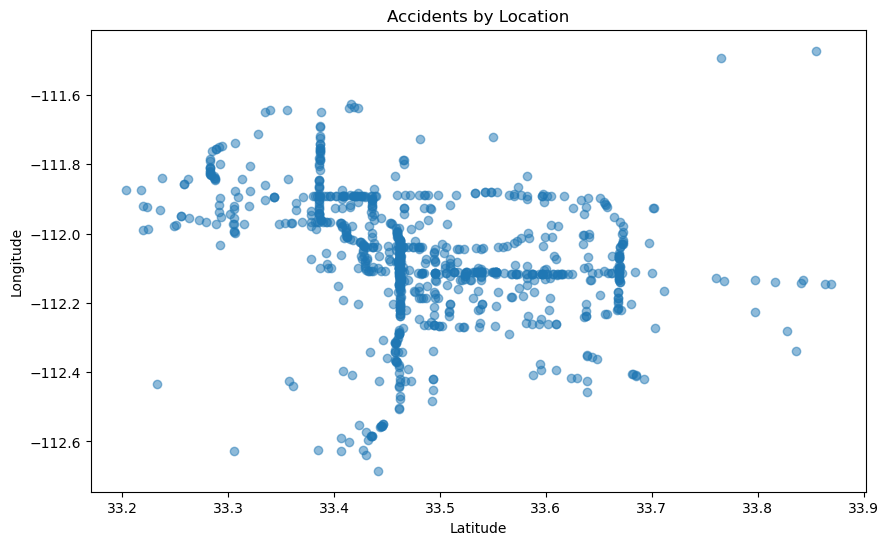

In [29]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Start_Lat'], df['Start_Lng'], alpha=0.5)
plt.title('Accidents by Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

## Accidents by Severity

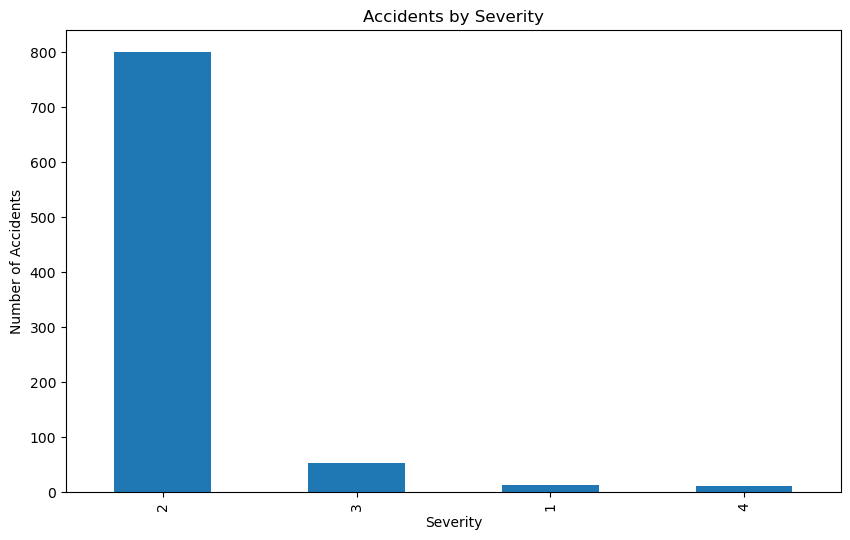

In [31]:
# Bar chart
severity_counts = df['Severity'].value_counts()
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar')
plt.title('Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

## Accidents by Weather Condition

In [33]:
# Count occurrences of each weather condition
weather_counts = df['Weather_Condition'].value_counts().reset_index()
weather_counts.columns = ['Weather_Condition', 'Count']

# Plotting
fig = px.bar(weather_counts, x='Weather_Condition', y='Count', title='Accidents by Weather Condition')
fig.show()

## Day and Night Counts

In [34]:
# Day and Night Counts
day_night_counts = df['Day_or_Night'].value_counts().reset_index()
day_night_counts.columns = ['Day_or_Night', 'Count']

# Plotting
fig = px.bar(day_night_counts, x='Day_or_Night', y='Count', title='Accidents by Day or Night')
fig.show()

## Monsoon Season

In [37]:
# Convert Accident_Date column to datetime
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'])

# Column indicates Monsoon season
df['Monsoon_Season'] = df['Accident_Date'].dt.month.isin([6, 7, 8, 9])

# Count accidents per weather condition and monsoon season
weather_accidents = df.groupby(['Weather_Condition', 'Monsoon_Season']).size().reset_index(name='Accidents')

# Plot
fig = px.bar(weather_accidents, x='Weather_Condition', y='Accidents', color='Monsoon_Season', barmode='group',
             title='Accidents by Weather Condition During Monsoon Season vs Rest of the Year',
             labels={'Monsoon_Season': 'Monsoon Season (June-September)'})

# layout
fig.update_layout(
    xaxis_title='Weather Condition',
    yaxis_title='Number of Accidents',
    hovermode='x unified'
)

# Show
fig.show()

## Traffic Control Impact

In [38]:
# Melt the dataframe to have a single column for traffic control type
df_melted = df.melt(id_vars=['Accident_Date', 'Severity'], 
                    value_vars=['Traffic_Signal', 'Stop', 'Junction', 'Give_Way'],
                    var_name='Traffic_Control_Type', value_name='Present')

# Filter only rows where traffic control is present
df_filtered = df_melted[df_melted['Present']]

# Count accidents by traffic control type and severity
traffic_control_severity = df_filtered.groupby(['Traffic_Control_Type', 'Severity']).size().reset_index(name='Accidents')

# Plotting with Plotly
fig = px.bar(traffic_control_severity, x='Traffic_Control_Type', y='Accidents', color='Severity', barmode='group',
             title='Impact of Traffic Controls on Accident Severity',
             labels={'Traffic_Control_Type': 'Traffic Control Type', 'Accidents': 'Number of Accidents'})

# Customize the layout
fig.update_layout(
    xaxis_title='Traffic Control Type',
    yaxis_title='Number of Accidents',
    hovermode='x unified'
)

# Show the plot
fig.show()